In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import sys
import os
import matplotlib.pyplot as plt

In [3]:

# Add the backend directory to the path so we can import from core
sys.path.append(os.path.abspath('../backend'))

from core.data.DataHandler import DataHandler
from core.analytics.Utils import Utils

# Initialize handlers
DATA_FILE_PATH = "../backend/core/data/SPY_Options_log.txt"
data_handler = DataHandler()
utils = Utils()

# Load and process the data
try:
    df = data_handler.parse_file(DATA_FILE_PATH)
    df = data_handler.get_basic_data(df)
    print(f"Successfully loaded {len(df)} options records")
except Exception as e:
    print(f"Error loading data: {str(e)}")
    df = None


/Users/mikeb/Desktop/VolaSurfer/backend/core/analytics/Utils.py:9: RuntimeWarning: invalid value encountered in sqrt
  d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
/Users/mikeb/Desktop/VolaSurfer/backend/core/analytics/Utils.py:10: RuntimeWarning: invalid value encountered in sqrt
  d2 = d1 - sigma * np.sqrt(T)
/Users/mikeb/Desktop/VolaSurfer/backend/core/analytics/Utils.py:208: RuntimeWarning: invalid value encountered in sqrt
  d1 = (np.log(S/K) + (r + 0.5 * np.power(sigma, 2)) * T) / sigma *np.sqrt(T)
/Users/mikeb/Desktop/VolaSurfer/backend/core/analytics/Utils.py:209: RuntimeWarning: invalid value encountered in sqrt
  vg = S * norm.pdf(d1, 0.0, 1.0) * np.sqrt(T)


Successfully loaded 45025 options records


In [4]:
df.head(10)

,timestamp,ticker_option,maturity,strike,option_type,bid_open,bid_high,bid_low,bid_close,ask_open,...,close,volume,bid_mid,ask_mid,mid_price,T,days_to_expiry,implied_volatility,log_strike,vega
0,2023-01-04 06:30:00,SPY,2023-01-20,364.0,Call,19.79,24.36,17.02,18.99,24.79,...,380.82,66519705.0,19.390,22.485,20.9375,0.043094,15.729167,0.314915,0.954827,31.521391
1,2023-01-04 06:30:00,SPY,2023-01-20,365.0,Call,18.93,23.47,16.11,18.17,23.93,...,380.82,66519705.0,18.550,21.635,20.0925,0.043094,15.729167,0.310893,0.957571,31.522844
2,2023-01-04 06:30:00,SPY,2023-01-20,366.0,Call,18.08,22.60,15.36,17.37,23.08,...,380.82,66519705.0,17.725,20.765,19.2450,0.043094,15.729167,0.306440,0.960307,31.524227
3,2023-01-04 06:30:00,SPY,2023-01-20,367.0,Call,18.19,21.74,14.76,16.58,23.19,...,380.82,66519705.0,17.385,20.435,18.9100,0.043094,15.729167,0.321574,0.963035,31.526919
4,2023-01-04 06:30:00,SPY,2023-01-20,368.0,Call,17.02,20.88,14.05,15.81,22.02,...,380.82,66519705.0,16.415,19.450,17.9325,0.043094,15.729167,0.311165,0.965756,31.527759
5,2023-01-04 06:30:00,SPY,2023-01-20,369.0,Call,16.54,20.04,13.33,15.05,19.94,...,380.82,66519705.0,15.795,18.015,16.9050,0.043094,15.729167,0.298752,0.968470,31.528500
6,2023-01-04 06:30:00,SPY,2023-01-20,370.0,Call,15.41,19.22,12.53,14.31,20.05,...,380.82,66519705.0,14.860,17.445,16.1525,0.043094,15.729167,0.296342,0.971176,31.529792
7,2023-01-04 06:30:00,SPY,2023-01-20,371.0,Call,14.62,18.40,11.98,13.59,18.35,...,380.82,66519705.0,14.105,16.455,15.2800,0.043094,15.729167,0.289171,0.973875,31.530799
8,2023-01-04 06:30:00,SPY,2023-01-20,372.0,Call,14.15,17.60,11.32,13.10,17.57,...,380.82,66519705.0,13.625,15.690,14.6575,0.043094,15.729167,0.290519,0.976567,31.532105
9,2023-01-04 06:30:00,SPY,2023-01-20,373.0,Call,13.38,16.81,10.69,12.41,16.82,...,380.82,66519705.0,12.895,14.950,13.9225,0.043094,15.729167,0.287364,0.979252,31.533139


In [5]:
print("Current index:", df.index)


Current index: RangeIndex(start=0, stop=45025, step=1)


In [6]:
# Check if the DataFrame has a MultiIndex
print("Is MultiIndex:", isinstance(df.index, pd.MultiIndex))
if isinstance(df.index, pd.MultiIndex):
    print("\nIndex levels:", df.index.names)
else:
    print("\nIndex type:", type(df.index))
    print("Index name:", df.index.name)


Is MultiIndex: False

Index type: <class 'pandas.core.indexes.range.RangeIndex'>
Index name: None


In [7]:
# Display the unique indexes available in the dataset
print("Unique timestamps:")
print(df['timestamp'].unique())
print(len(df['timestamp'].unique()))

print("\nUnique maturities:")
print(len(df['maturity'].unique()))

print("\nUnique strikes:")
print(len(df['strike'].unique()))

print("\nUnique option types:")
print(df['option_type'].unique())


Unique timestamps:
<DatetimeArray>
['2023-01-04 06:30:00', '2023-01-05 06:30:00', '2023-01-06 06:30:00',
 '2023-01-09 06:30:00', '2023-01-10 06:30:00', '2023-01-11 06:30:00',
 '2023-01-12 06:30:00', '2023-01-13 06:30:00', '2023-01-17 06:30:00',
 '2023-01-18 06:30:00',
 ...
 '2023-10-24 06:30:00', '2023-10-25 06:30:00', '2023-10-26 06:30:00',
 '2023-10-27 06:30:00', '2023-10-30 06:30:00', '2023-10-31 06:30:00',
 '2023-11-01 06:30:00', '2023-11-02 06:30:00', '2023-11-03 06:30:00',
 '2023-11-06 06:30:00']
Length: 212, dtype: datetime64[ns]
212

Unique maturities:
23

Unique strikes:
117

Unique option types:
['Call' 'Put']


In [8]:
# Set the index to be timestamp, maturity, strike, option_type in that order
df.set_index(['timestamp', 'days_to_expiry', 'strike', 'option_type'], inplace=True)

# Sort the index for better performance
df.sort_index(inplace=True)

# Verify the new index structure
print("\nNew index structure:")
print(df.index.names)



New index structure:
['timestamp', 'days_to_expiry', 'strike', 'option_type']


In [9]:
df.head(10)

ticker_option  \
timestamp           days_to_expiry strike option_type                 
2023-01-04 06:30:00 15.729167      364.0  Call                  SPY   
                                          Put                   SPY   
                                   365.0  Call                  SPY   
                                          Put                   SPY   
                                   366.0  Call                  SPY   
                                          Put                   SPY   
                                   367.0  Call                  SPY   
                                          Put                   SPY   
                                   368.0  Call                  SPY   
                                          Put                   SPY   

                                                        maturity  bid_open  \
timestamp           days_to_expiry strike option_type                        
2023-01-04 06:30:00 15.729167      364.0  Call        2023-01-20     19.79   
                                          Put         2023-01-20      1.57   
                                   365.0  Call        2023-01-20     18.93   
                                          Put         2023-01-20      1.70   
                                   366.0  Call        2023-01-20     18.08   
                                          Put         2023-01-20      1.87   
                                   367.0  Call        2023-01-20     18.19   
                                          Put         2023-01-20      2.01   
                                   368.0  Call        2023-01-20     17.02   
                                          Put         2023-01-20      2.20   

                                                       bid_high  bid_low  \
timestamp           days_to_expiry strike option_type                      
2023-01-04 06:30:00 15.729167      364.0  Call            24.36    17.02   
                                          Put              2.61     1.26   
                                   365.0  Call            23.47    16.11   
                                          Put              2.83     1.38   
                                   366.0  Call            22.60    15.36   
                                          Put              3.07     1.50   
                                   367.0  Call            21.74    14.76   
                                          Put              3.32     1.63   
                                   368.0  Call            20.88    14.05   
                                          Put              3.59     1.78   

                                                       bid_close  ask_open  \
timestamp           days_to_expiry strike option_type                        
2023-01-04 06:30:00 15.729167      364.0  Call             18.99     24.79   
                                          Put               1.86      1.60   
                                   365.0  Call             18.17     23.93   
                                          Put               2.03      1.94   
                                   366.0  Call             17.37     23.08   
                                          Put               2.21      1.91   
                                   367.0  Call             16.58     23.19   
                                          Put               2.41      2.18   
                                   368.0  Call             15.81     22.02   
                                          Put               2.62      2.25   

                                                       ask_high  ask_low  \
timestamp           days_to_expiry strike option_type                      
2023-01-04 06:30:00 15.729167      364.0  Call            25.49    17.36   
                                          Put              2.64     1.28   
                                   365.0  Call            24.61    16.58   
                                  

In [10]:
# Calculate volatility for each timestamp using log returns
close_price = df.groupby('timestamp')['close'].mean()
log_returns = np.log(close_price / close_price.shift(1))
volatility = log_returns.rolling(window=20).std() * np.sqrt(252)  # Annualized volatility
volatility

timestamp
2023-01-04 06:30:00         NaN
2023-01-05 06:30:00         NaN
2023-01-06 06:30:00         NaN
2023-01-09 06:30:00         NaN
2023-01-10 06:30:00         NaN
                         ...   
2023-10-31 06:30:00    0.144644
2023-11-01 06:30:00    0.139651
2023-11-02 06:30:00    0.142567
2023-11-03 06:30:00    0.158037
2023-11-06 06:30:00    0.155788
Name: close, Length: 212, dtype: float64

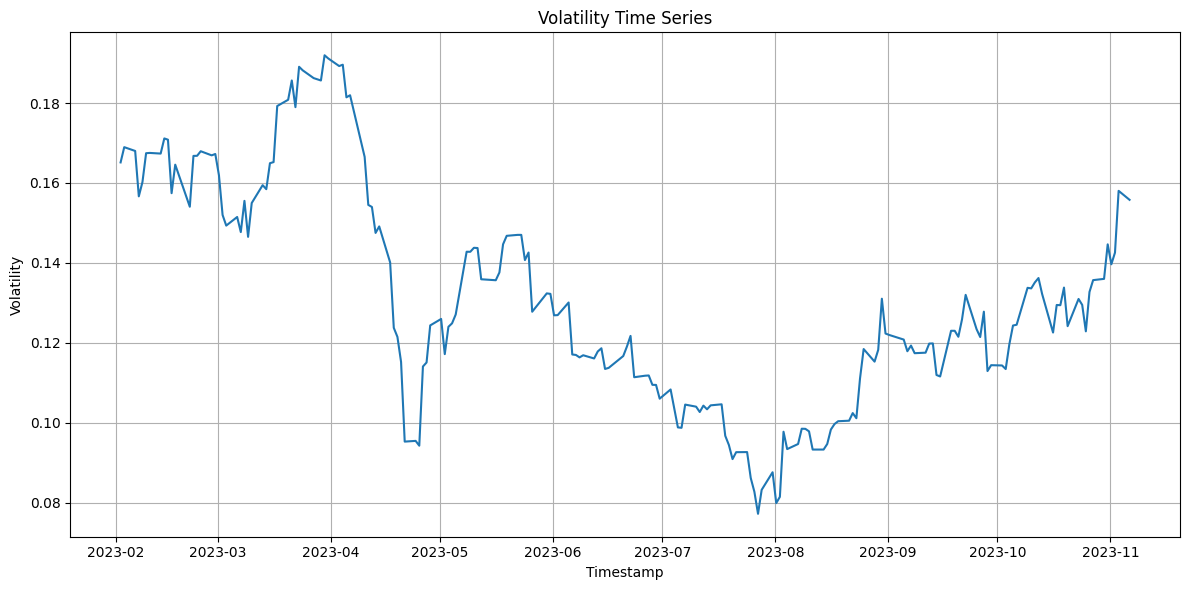

In [11]:
# Plot the volatility time series using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(volatility.index, volatility)

plt.title('Volatility Time Series')
plt.xlabel('Timestamp')
plt.ylabel('Volatility')
plt.grid(True)

plt.tight_layout()
plt.show()


In [12]:
def get_nearest_contracts(df, target_days=30, n_strikes=4):
    # Create an empty list to store filtered dataframes
    filtered_dfs = []
    
    # Process each unique timestamp
    for timestamp in df.index.get_level_values('timestamp').unique():
        # Get data for this timestamp
        df_t = df.xs(timestamp, level='timestamp')
        
        # Find the expiry closest to target_days
        days_to_expiry = df_t.index.get_level_values('days_to_expiry').unique()
        nearest_expiry = days_to_expiry[np.abs(days_to_expiry - target_days).argmin()]
        
        # Get data for nearest expiry
        df_te = df_t.xs(nearest_expiry, level='days_to_expiry')
        
        # Get the close price for this timestamp
        close_price = df_te['close'].iloc[0]
        
        # Get unique strikes
        strikes = df_te.index.get_level_values('strike').unique()
        
        # Find n closest strikes to close price
        closest_strikes = strikes[np.argsort(np.abs(strikes - close_price))[:n_strikes]]
        
        # Filter for these strikes
        df_tes = df_te[df_te.index.get_level_values('strike').isin(closest_strikes)]
        
        # Add back the timestamp index level
        df_tes = df_tes.assign(timestamp=timestamp).set_index('timestamp', append=True).reorder_levels(['timestamp', 'strike', 'option_type'])
        
        filtered_dfs.append(df_tes)
    
    # Combine all filtered dataframes
    result = pd.concat(filtered_dfs)
    
    return result

# Example usage:
nearest_contracts = get_nearest_contracts(df, target_days=30, n_strikes=4)
print("Shape of filtered data:", nearest_contracts.shape)
print("\nSample of filtered contracts:")
print(nearest_contracts.head(8))


Shape of filtered data: (1696, 23)

Sample of filtered contracts:
                                       ticker_option   maturity  bid_open  \
timestamp           strike option_type                                      
2023-01-04 06:30:00 379.0  Call                  SPY 2023-02-17     16.17   
                           Put                   SPY 2023-02-17      8.94   
                    380.0  Call                  SPY 2023-02-17     15.48   
                           Put                   SPY 2023-02-17      9.27   
                    381.0  Call                  SPY 2023-02-17     15.12   
                           Put                   SPY 2023-02-17      9.65   
                    382.0  Call                  SPY 2023-02-17     14.54   
                           Put                   SPY 2023-02-17     10.04   

                                        bid_high  bid_low  bid_close  \
timestamp           strike option_type                                 
2023-01-04 06:30:00

In [13]:
def calculate_iv_index(contracts_df):
    """
    Calculate vega-weighted implied volatility index from nearest contracts.
    For each timestamp, aggregates implied volatilities weighted by vega separately 
    for calls and puts, then averages the two.
    
    Args:
        contracts_df: DataFrame with multi-index [timestamp, strike, option_type]
                     containing 'implied_vol' and 'vega' columns
    
    Returns:
        Series indexed by timestamp containing the IV index values
    """
    # Initialize list to store results
    iv_index_values = []
    timestamps = contracts_df.index.get_level_values('timestamp').unique()
    
    for ts in timestamps:
        ts_data = contracts_df.xs(ts, level='timestamp')
        
        # Calculate weighted IV separately for calls and puts
        call_data = ts_data.xs('Call', level='option_type')
        put_data = ts_data.xs('Put', level='option_type')
        
        # Weight IVs by vega
        weighted_call_iv = (call_data['implied_volatility'] * call_data['vega']).sum() / call_data['vega'].sum()
        weighted_put_iv = (put_data['implied_volatility'] * put_data['vega']).sum() / put_data['vega'].sum()
        
        # Average of call and put weighted IVs
        iv_index = (weighted_call_iv + weighted_put_iv) / 2
        
        iv_index_values.append((ts, iv_index))
    
    # Create series from results
    iv_index_series = pd.Series(dict(iv_index_values), name='iv_index')
    iv_index_series.index.name = 'timestamp'
    
    return iv_index_series

# Example usage:
iv_index = calculate_iv_index(nearest_contracts)
print("\nImplied Volatility Index values:")
print(iv_index.head())



Implied Volatility Index values:
timestamp
2023-01-04 06:30:00    0.207387
2023-01-05 06:30:00    0.197713
2023-01-06 06:30:00    0.207073
2023-01-09 06:30:00    0.203663
2023-01-10 06:30:00    0.194814
Name: iv_index, dtype: float64


/var/folders/qf/_lw98w6j05n0p0bwxdtwdl7r0000gn/T/ipykernel_28939/3627664421.py:27: RuntimeWarning: invalid value encountered in scalar divide
  weighted_put_iv = (put_data['implied_volatility'] * put_data['vega']).sum() / put_data['vega'].sum()


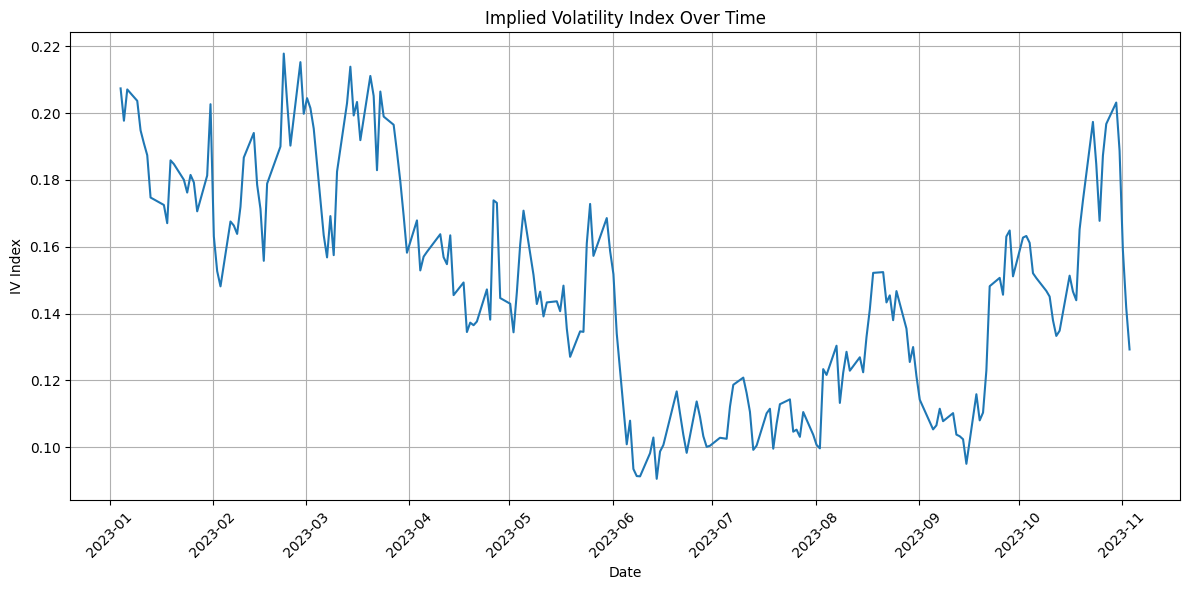

In [14]:
# Plot the IV index over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(iv_index.index, iv_index.values)
plt.title('Implied Volatility Index Over Time')
plt.xlabel('Date')
plt.ylabel('IV Index')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


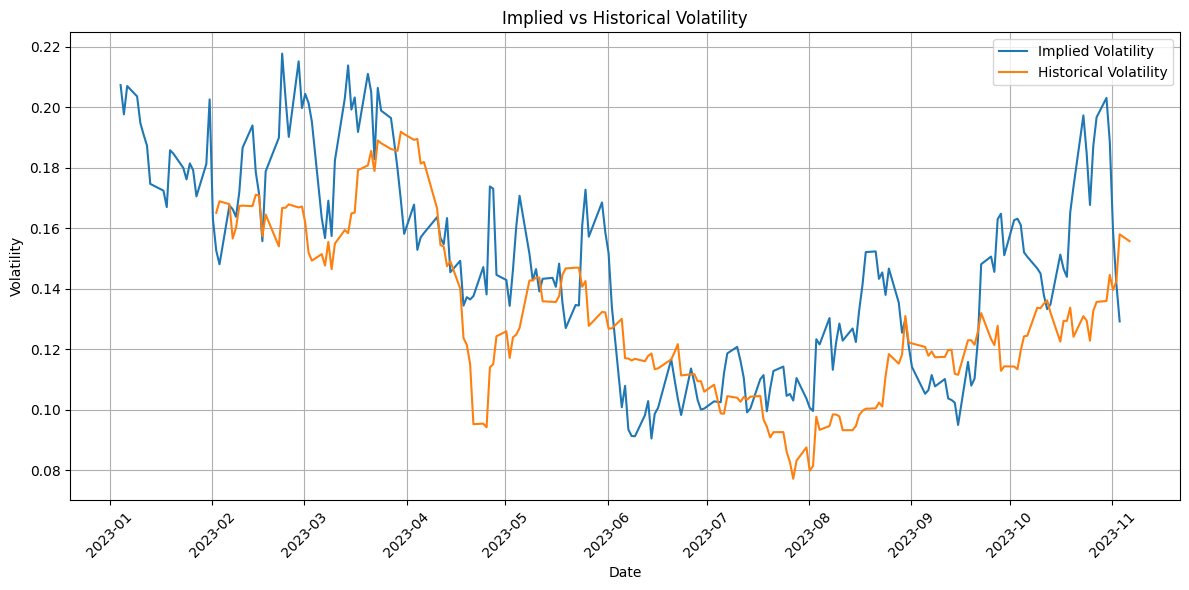

In [15]:
# Plot both historical and implied volatility
plt.figure(figsize=(12,6))
plt.plot(iv_index.index, iv_index.values, label='Implied Volatility')
plt.plot(volatility.index, volatility.values, label='Historical Volatility')
plt.title('Implied vs Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


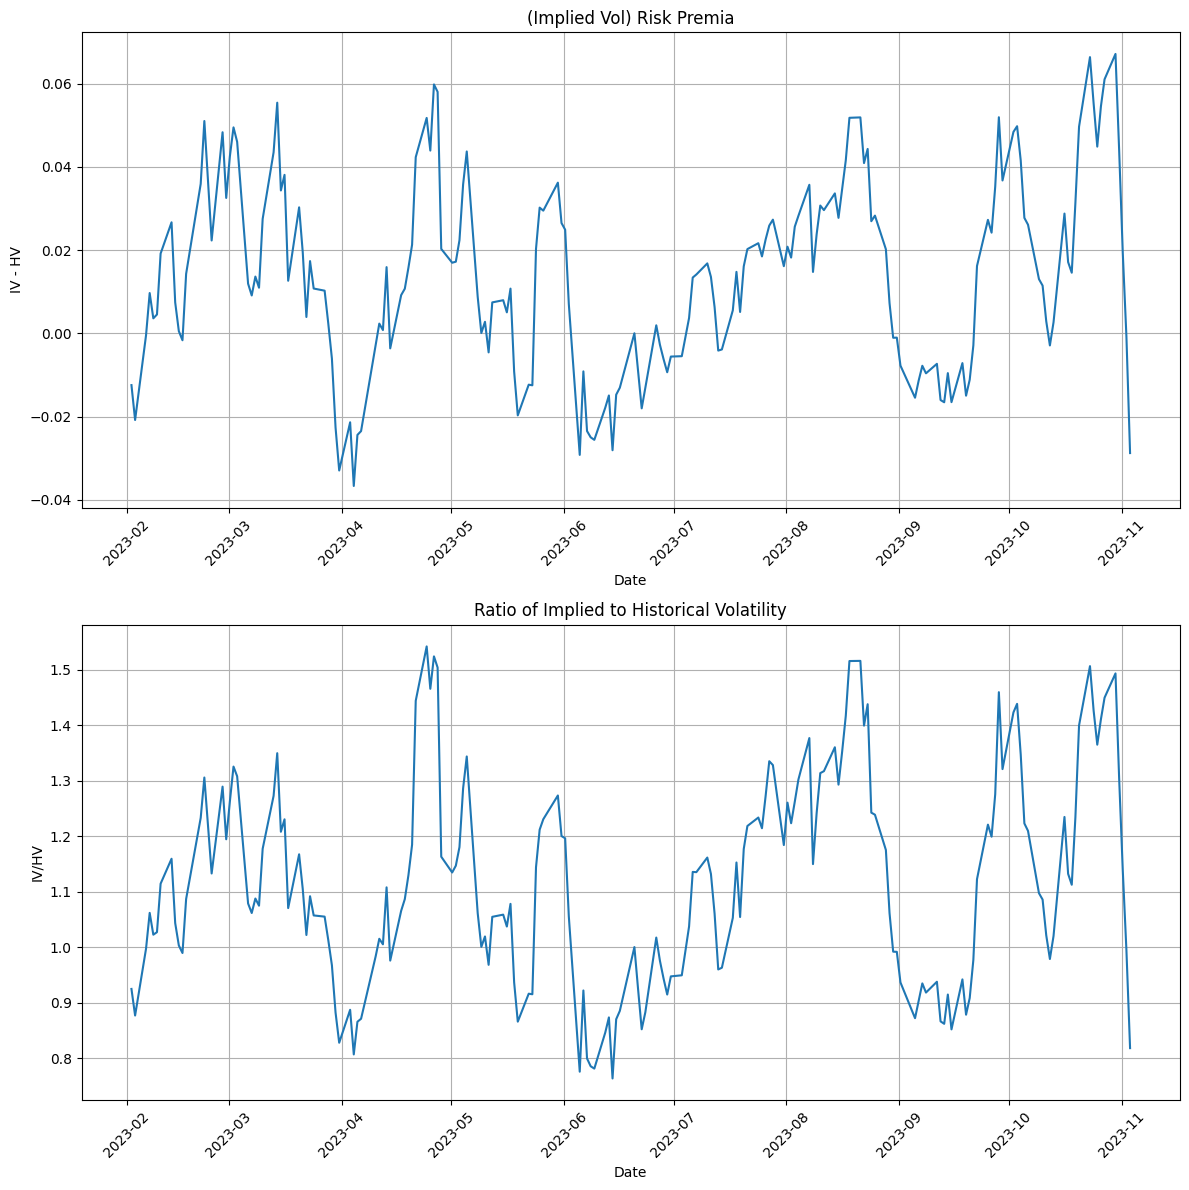

In [16]:
# Plot the difference and ratio between IV and HV
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot difference (IV - HV)
diff = iv_index - volatility
ax1.plot(diff.index, diff.values)
ax1.set_title('(Implied Vol) Risk Premia')
ax1.set_xlabel('Date')
ax1.set_ylabel('IV - HV')
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# Plot ratio (IV/HV) 
ratio = iv_index / volatility
ax2.plot(ratio.index, ratio.values)
ax2.set_title('Ratio of Implied to Historical Volatility')
ax2.set_xlabel('Date')
ax2.set_ylabel('IV/HV')
ax2.grid(True)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## More IV Indexes

In [38]:
# Example usage:
d10_s2__contracts = get_nearest_contracts(df, target_days=20, n_strikes=2)
print("Shape of filtered data:", d10_s2__contracts.shape)
print("\nSample of filtered contracts:")
print(d10_s2__contracts.head(8))

# Example usage:
iv_index_10 = calculate_iv_index(d10_s2__contracts)
print("\nImplied Volatility Index values:")
print(iv_index_10.head())

Shape of filtered data: (848, 23)

Sample of filtered contracts:
                                       ticker_option   maturity  bid_open  \
timestamp           strike option_type                                      
2023-01-04 06:30:00 380.0  Call                  SPY 2023-01-20     10.32   
                           Put                   SPY 2023-01-20      5.39   
                    381.0  Call                  SPY 2023-01-20      9.79   
                           Put                   SPY 2023-01-20      5.78   
2023-01-05 06:30:00 383.0  Call                  SPY 2023-01-20      6.50   
                           Put                   SPY 2023-01-20      7.88   
                    384.0  Call                  SPY 2023-01-20      6.02   
                           Put                   SPY 2023-01-20      8.39   

                                        bid_high  bid_low  bid_close  \
timestamp           strike option_type                                 
2023-01-04 06:30:00 

/var/folders/qf/_lw98w6j05n0p0bwxdtwdl7r0000gn/T/ipykernel_28939/3627664421.py:27: RuntimeWarning: invalid value encountered in scalar divide
  weighted_put_iv = (put_data['implied_volatility'] * put_data['vega']).sum() / put_data['vega'].sum()


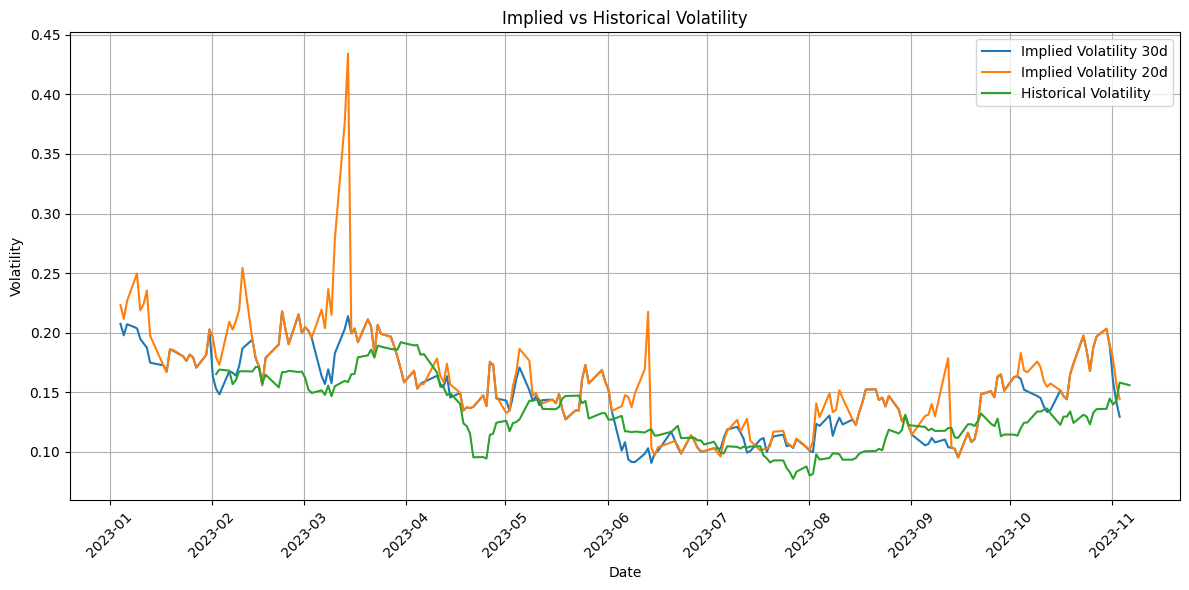

In [40]:
# Plot both historical and implied volatility
plt.figure(figsize=(12,6))
plt.plot(iv_index.index, iv_index.values, label='Implied Volatility 30d')
plt.plot(iv_index_10.index, iv_index_10.values, label='Implied Volatility 20d')
plt.plot(volatility.index, volatility.values, label='Historical Volatility')
plt.title('Implied vs Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()